Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Date
1970-01-09      93.250000
1970-01-12      92.669998
1970-01-13      92.610001
1970-01-14      92.400002
1970-01-15      92.349998
                 ...     
2022-08-31    4015.370117
2022-09-01    3970.229980
2022-09-02    4018.429932
2022-09-06    3942.550049
2022-09-07    3929.600098
Name: High, Length: 13284, dtype: float64

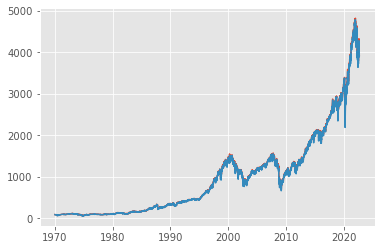

In [1]:
import keras
import os
os.environ['KERAS_BACKEND' ] = 'tensorflow'
os.environ['MKL_THREADING_LAYER'] = 'GNU'
from sklearn.neural_network import MLPRegressor
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.callbacks import TensorBoard
import keras
from keras.optimizers import SGD
import pandas as pd
import numpy as np
from keras import optimizers
# from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import time 
import quandl
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler as mini
quandl.ApiConfig.api_key = "p_aAK6D87z8PVVvX4kYM"
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pandas import DataFrame
from matplotlib import style
from sklearn.linear_model import LinearRegression
import quandl
import datetime
style.use('ggplot')
from sklearn.metrics import r2_score
# import yfinance as yf 
from pandas_datareader.data import DataReader
from datetime import datetime


SPY = DataReader("^GSPC", "yahoo",datetime(1970,1,1), datetime(2022,9,7))
plt.plot(SPY['High'])
plt.plot(SPY['Low'])
# plt.plot(SPY['Adj Close'])
# plt.plot(SPY['ex-dividend'])
SPY['High'][5:]
# SPY['Adj Close'][5:]

In [14]:
#Create a new dataframe with only the 'Close' column
data =SPY['Low']
batch_size = 475
NAME= 'MLPISH'
dropout = 0.6
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(SPY) * 0.8 )

training_data_len

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(SPY)


SPY_df = SPY.reset_index()
SPY_prices = SPY_df['Low'].tolist()
SPY_dates = SPY_df.index.tolist()
#Convert to 1d Vector
SPY_dates = np.reshape(SPY_dates, (len(SPY_dates), 1))
SPY_prices = np.reshape(SPY_prices, (len(SPY_prices), 1))


# scaled_data
# x,y,x_test,y_test = train_test_split(SPY_dates,SPY_prices,test_size=.43)

#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

#create a loop
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #Will conaint 60 values (0-59)
    y_train.append(train_data[i, 0]) #Will contain the 61th value (60)
    if i <= 60:
        print(x_train)
        print(y_train)



#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=10,validation_split=0.66)

#Create the testing data set
#Create a new array containing scaled values from index 1738 to 2247
test_data = scaled_data[training_data_len - 60:]
#Create the data set x_test and y_test
x_test = []
y_test = SPY.iloc[training_data_len:, :].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

[array([0.00637382, 0.00652312, 0.0064306 , 0.00634017, 0.0063591 ,
       0.00631284, 0.00619087, 0.00617825, 0.00613409, 0.00612358,
       0.00615302, 0.00578081, 0.00572403, 0.00575768, 0.00579763,
       0.00572403, 0.00546748, 0.00532238, 0.00525929, 0.00501746,
       0.00485765, 0.00494807, 0.00511209, 0.00513733, 0.00491863,
       0.0049733 , 0.00517728, 0.00508265, 0.00507845, 0.00511209,
       0.00506163, 0.00506163, 0.00501536, 0.00522355, 0.00535603,
       0.00536444, 0.00540019, 0.00558734, 0.00555159, 0.0056988 ,
       0.00579763, 0.00577029, 0.0058502 , 0.00583759, 0.00570511,
       0.00550954, 0.00550533, 0.00554108, 0.00543804, 0.00550954,
       0.00520252, 0.00517939, 0.00526771, 0.00525088, 0.00516046,
       0.00513312, 0.00529925, 0.00585441, 0.00576609, 0.00571562])]
[0.005665150063450296]
Train on 3594 samples, validate on 6978 samples
Epoch 1/10
3594/3594 [==============================] - 7s - loss: 6.4306e-05 - val_loss: 0.0315
Epoch 2/10
3594/3594 [===

### SCALED BACKTEST / PREDICTIONS FROM 2012-CURRENT

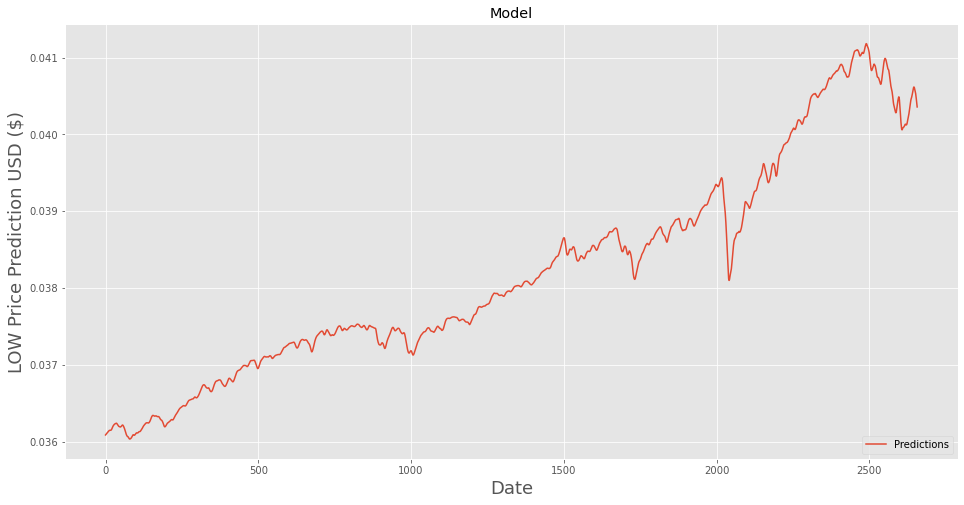

In [15]:

#Get the model's predicted price values for the x_test data set
predictions = model.predict(x_test)
# predictions = np.reshape(predictions, (len(predictions), 1))
# predictions = scaler.inverse_transform(predictions)
# predictions = predictions[:,0]

# #Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LOW Price Prediction USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Predictions'], loc='lower right')
plt.show()

### TRUE PRICE FROM 2004-CURRENT

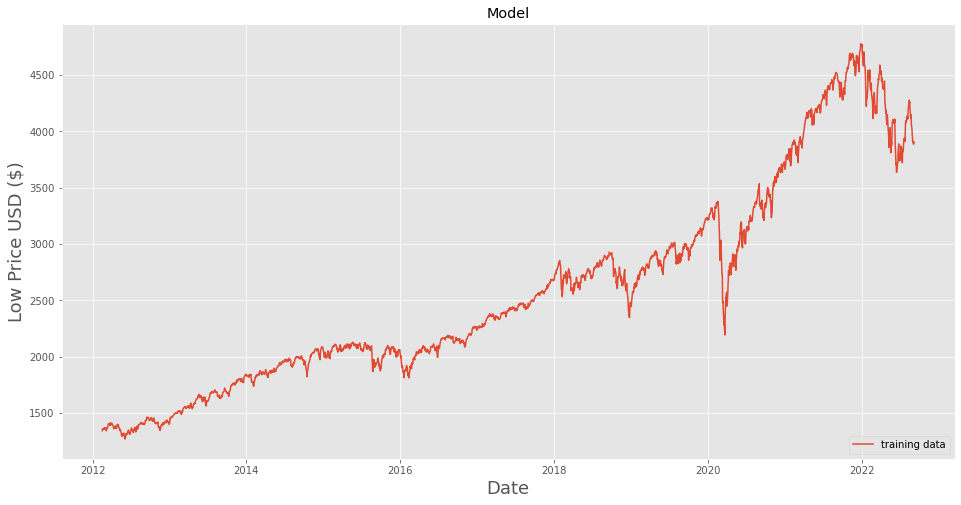

In [16]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(data[training_data_len:])
plt.legend(['training data'], loc='lower right')
plt.show()

### INVERSE SCALING TO PREDICT A WEEKLY FORECAST

In [17]:
np.shape(x_test)
np.shape(x_train)

(10572, 60, 1)

[[0.04035752]]
[[0.0399418]]
[[0.03938947]]
4780.0400390625
[3668.14065347 3667.65896664 3667.01900807]
            Predictions
Date                   
2022-09-08  3668.140653
2022-09-09  3667.658967
2022-09-10  3667.019008


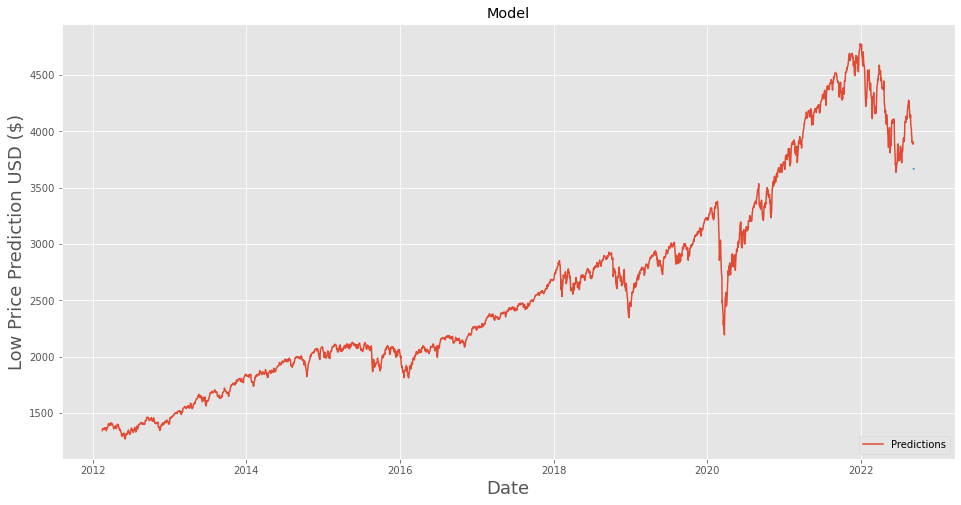

In [18]:
X_FUTURE =  3
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
    
minimum = np.min(SPY['Low'][10572:])    
minimum

maximum = np.max(SPY['Low'][10572:])    
maximum

print(maximum)

predictions = predictions * minimum + (maximum - minimum)
print(predictions)

import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
    curr_date = curr_date + timedelta(days=1)
    dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")
print(new_data)

# Plot the data
train = data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price Prediction USD ($)', fontsize=18)
plt.plot(data[training_data_len:])
plt.plot(new_data['Predictions'])
plt.legend(['Predictions'], loc='lower right')
plt.show()